In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#**Exploring the data set**

In [ ]:
import pandas as pd

df = pd.read_csv("train_all_tasks.csv")


Checking the first few rows of the dataset using the head() method:

In [ ]:
print(df.head())

                  rewire_id  \
0   sexism2022_english-7358   
1   sexism2022_english-2367   
2   sexism2022_english-3073   
3  sexism2022_english-14895   
4   sexism2022_english-4118   

                                                text label_sexist  \
0              Damn, this writing was pretty chaotic   not sexist   
1  Yeah, and apparently a bunch of misogynistic v...   not sexist   
2       How the FUCK is this woman still an MP!!!???   not sexist   
3  Understand. Know you're right. At same time I ...   not sexist   
4     Surprized they didn't stop and rape some women   not sexist   

  label_category label_vector  
0           none         none  
1           none         none  
2           none         none  
3           none         none  
4           none         none  


Checking the shape of the dataset (number of rows and columns) using the shape attribute:

In [ ]:
print(df.shape)

(14000, 5)


Checking the data types of each column using the dtypes attribute:

In [ ]:
print(df.dtypes)

rewire_id         object
text              object
label_sexist      object
label_category    object
label_vector      object
dtype: object


Checking the summary statistics of numerical columns using the describe() method:

In [ ]:
print(df.describe())

                      rewire_id                                   text  \
count                     14000                                  14000   
unique                    14000                                  14000   
top     sexism2022_english-7358  Damn, this writing was pretty chaotic   
freq                          1                                      1   

       label_sexist label_category label_vector  
count         14000          14000        14000  
unique            2              5           12  
top      not sexist           none         none  
freq          10602          10602        10602  


Checking the distribution of categorical columns using the value_counts() method:

In [ ]:
print(df['label_sexist'].value_counts())


not sexist    10602
sexist         3398
Name: label_sexist, dtype: int64


Checking the missing values in the dataset using the isnull() method:

In [ ]:
print(df.isnull().sum())

rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
dtype: int64


In [ ]:
df.groupby('label_sexist').describe()

rewire_id                                         text         \
                 count unique                       top freq  count unique   
label_sexist                                                                 
not sexist       10602  10602   sexism2022_english-7358    1  10602  10602   
sexist            3398   3398  sexism2022_english-10142    1   3398   3398   

                                                                      \
                                                            top freq   
label_sexist                                                           
not sexist                Damn, this writing was pretty chaotic    1   
sexist        just the inside of your wallet: cash, bank car...    1   

             label_category                              label_vector         \
                      count unique            top   freq        count unique   
label_sexist                                                                   
not sexist            10602      1           none  10602        10602      1   
sexist                 3398      4  2. derogation   1590         3398     11   

                                              
                                  top   freq  
label_sexist                                  
not sexist                       none  10602  
sexist        2.1 descriptive attacks    717

#**Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def preprocess_text(text_column):
    text_column = text_column.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
    text_column = text_column.apply(lambda x: re.sub(r'\d+', '', x))
    text_column = text_column.apply(word_tokenize)
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text_column = text_column.apply(lambda x: [word for word in x if word not in stop_words])
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    text_column = text_column.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    text_column = text_column.apply(lambda x: ' '.join(x))
    return text_column

main_data = pd.read_csv('/content/train_all_tasks.csv')
main_data['label_sexist'] = main_data['label_sexist'].map({'sexist': 0, 'not sexist': 1})
X = main_data['text']
Y = main_data['label_sexist']
X = preprocess_text(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=3)
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

model = LogisticRegression()
model.fit(X_train_features, Y_train)

Y_pred = model.predict(X_test_features)
nb_report = classification_report(Y_test, Y_pred)
print(nb_report)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.85      0.31      0.45       684
           1       0.81      0.98      0.89      2116

    accuracy                           0.82      2800
   macro avg       0.83      0.64      0.67      2800
weighted avg       0.82      0.82      0.78      2800



In [ ]:
dev_data = pd.read_csv('/content/dev_task_a_entries.csv')
X_dev = preprocess_text(dev_data['text'])
X_dev_features = vectorizer.transform(X_dev)
predictions = model.predict(X_dev_features)
predictions = np.where(predictions == 0, 'sexist', 'not sexist')
predicted_data = pd.DataFrame({'rewire_id': dev_data['rewire_id'], 'label_sexist': predictions})
predicted_data.to_csv('/content/predicted.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


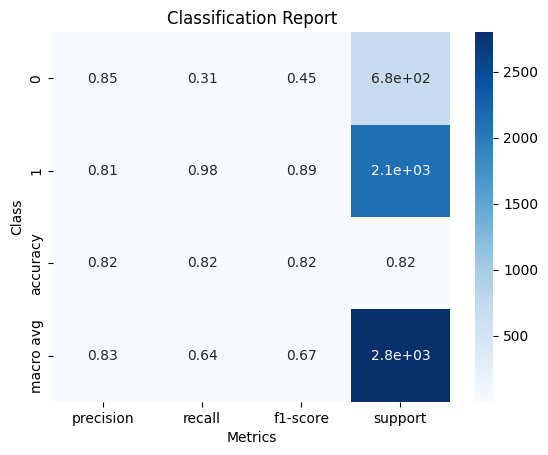

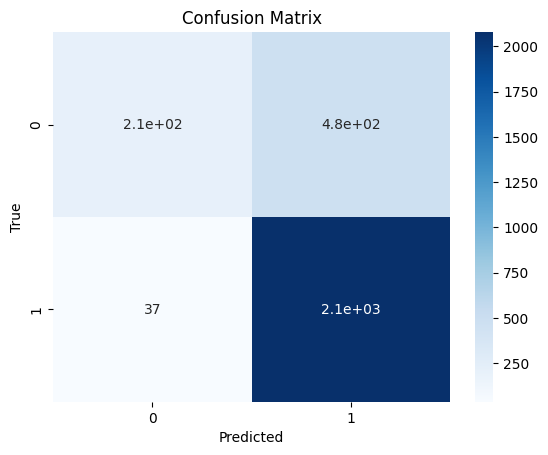

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
report = classification_report(Y_test, Y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#**SVM MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, classification_report
def preprocess_text(text_column):
    text_column = text_column.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
    text_column = text_column.apply(lambda x: re.sub(r'\d+', '', x))
    text_column = text_column.apply(word_tokenize)
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text_column = text_column.apply(lambda x: [word for word in x if word not in stop_words])
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    text_column = text_column.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    text_column = text_column.apply(lambda x: ' '.join(x))
    return text_column


main_data = pd.read_csv('/content/train_all_tasks.csv')
main_data['label_sexist'] = main_data['label_sexist'].map({'sexist': 0, 'not sexist': 1})

X = main_data['text']
Y = main_data['label_sexist']

X = preprocess_text(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=3)

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=1)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

svm = SVC()
svm.fit(X_train_features, Y_train)
y_pred = svm.predict(X_test_features)
svm_report = classification_report(Y_test, y_pred)
print(svm_report)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.29      0.45       684
           1       0.81      1.00      0.90      2116

    accuracy                           0.82      2800
   macro avg       0.88      0.64      0.67      2800
weighted avg       0.85      0.82      0.79      2800



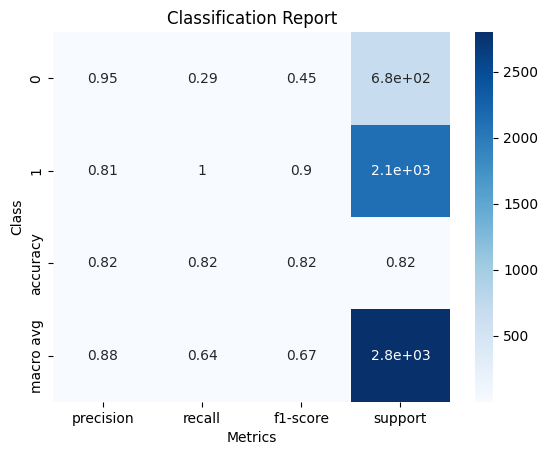

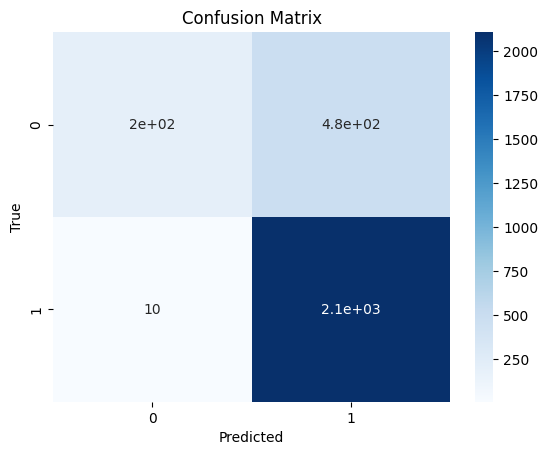

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
report = classification_report(Y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Neural Network**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

main_data = pd.read_csv("train_all_tasks.csv")
main_data['label_sexist'] = main_data['label_sexist'].replace({'sexist': 0, 'not sexist': 1})
def preprocess_text(text_column):
    text_column = text_column.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
    text_column = text_column.apply(lambda x: re.sub(r'\d+', '', x))
    text_column = text_column.apply(word_tokenize)
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text_column = text_column.apply(lambda x: [word for word in x if word not in stop_words])
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    text_column = text_column.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    text_column = text_column.apply(lambda x: ' '.join(x))
    return text_column

X = preprocess_text(main_data['text'])
y = main_data['label_sexist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)
print("Classification Report for Test Set:")
neural_report = classification_report(y_test, y_pred)
print(neural_report)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       704
           1       0.83      0.88      0.85      2096

    accuracy                           0.77      2800
   macro avg       0.70      0.67      0.68      2800
weighted avg       0.76      0.77      0.77      2800



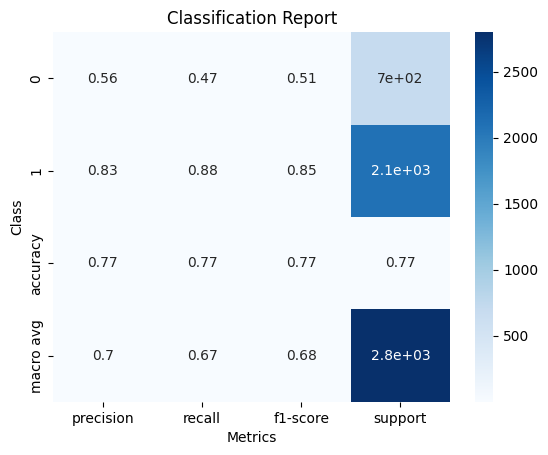

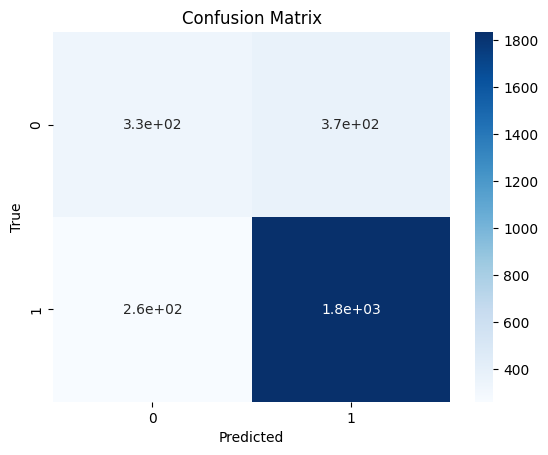

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
report = classification_report(y_test,y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()